In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from floater.generators import FloatSet
from xmitgcm import open_mdsdataset
%matplotlib inline

In [2]:
ds = open_mdsdataset('/data/scratch/rpa/global_lagrangian/run', iters=None)
ds

/home/cz2397/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:  (XC: 3600, XG: 3600, YC: 1600, YG: 1600, Z: 1, Zl: 1, Zp1: 2, Zu: 1)
Coordinates:
  * XC       (XC) >f4 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 ...
  * YC       (YC) >f4 -79.95 -79.85 -79.75 -79.65 -79.55 -79.45 -79.35 ...
  * XG       (XG) >f4 -2.77556e-17 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 ...
  * YG       (YG) >f4 -80.0 -79.9 -79.8 -79.7 -79.6 -79.5 -79.4 -79.3 -79.2 ...
  * Z        (Z) >f4 -50.0
  * Zp1      (Zp1) >f4 0.0 -100.0
  * Zu       (Zu) >f4 -100.0
  * Zl       (Zl) >f4 0.0
    rA       (YC, XC) >f4 2.15699e+07 2.15699e+07 2.15699e+07 2.15699e+07 ...
    dxG      (YG, XC) >f4 1930.58 1930.58 1930.58 1930.58 1930.58 1930.58 ...
    dyG      (YC, XG) >f4 11117.7 11117.7 11117.7 11117.7 11117.7 11117.7 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rAz      (YG, XG) >f4 2.14637e+07 2.14637e+07 2.14637e+07 2.14637e+07 ...
    dxC      (YC, XG) >f4 1940.13 1940.13 1940.13 1940.13 1940.13 1

In [3]:
lon = ds.XC.values
lat = ds.YC.values
land_mask = (ds.hFacC.values==1)

In [4]:
model_grid = {'lon': lon, 'lat': lat, 'land_mask': land_mask}

In [5]:
fs = FloatSet(xlim=(0, 360), ylim=(-80, 70), dx=0.03125, dy=0.03125, model_grid=model_grid)

In [6]:
path_hex = '/data/scratch/cz2397/rclv-eddies/flt_ini_pos_hex.global.32deg_f4'
path_rec = '/data/scratch/cz2397/rclv-eddies/flt_ini_pos_rec.global.32deg_f4'

In [7]:
pkl_path_hex = path_hex + '.pkl'
pkl_path_rec = path_rec + '.pkl'

In [8]:
fs.to_pickle(pkl_path_hex)
fs.to_pickle(pkl_path_rec)

In [9]:
bin_path_hex = path_hex + '.bin'
bin_path_rec = path_rec + '.bin'

In [10]:
fs.to_mitgcm_format(bin_path_hex, mesh='hex', read_binary_prec=32)
fs.to_mitgcm_format(bin_path_rec, mesh='rect', read_binary_prec=32)

In [11]:
floats_hex = np.fromfile(bin_path_hex, dtype='>f4')

In [12]:
total_num_hex = len(floats_hex)
total_num_hex

334190736

In [13]:
float_num_hex = total_num_hex//9
float_num_hex

37132304

In [14]:
floats_hex.shape = (float_num_hex, 9)
floats_hex.shape

(37132304, 9)

In [15]:
x_hex = floats_hex[:, 2]
y_hex = floats_hex[:, 3]

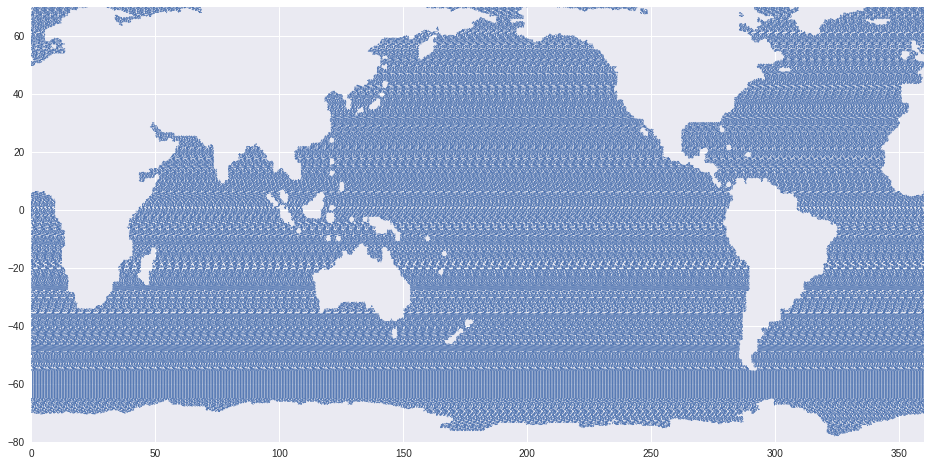

In [16]:
sns.set()
plt.rcParams['figure.figsize'] = (16, 8)
plt.scatter(x_hex[::100], y_hex[::100], edgecolor='none', s=1)
plt.xlim([0, 360])
plt.ylim([-80, 70])
plt.show()

In [17]:
floats_rec = np.fromfile(bin_path_rec, dtype='>f4')

In [18]:
total_num_rec = len(floats_rec)
total_num_rec

334225728

In [19]:
float_num_rec = total_num_rec//9
float_num_rec

37136192

In [20]:
floats_rec.shape = (float_num_rec, 9)
floats_rec.shape

(37136192, 9)

In [21]:
x_rec = floats_rec[:, 2]
y_rec = floats_rec[:, 3]

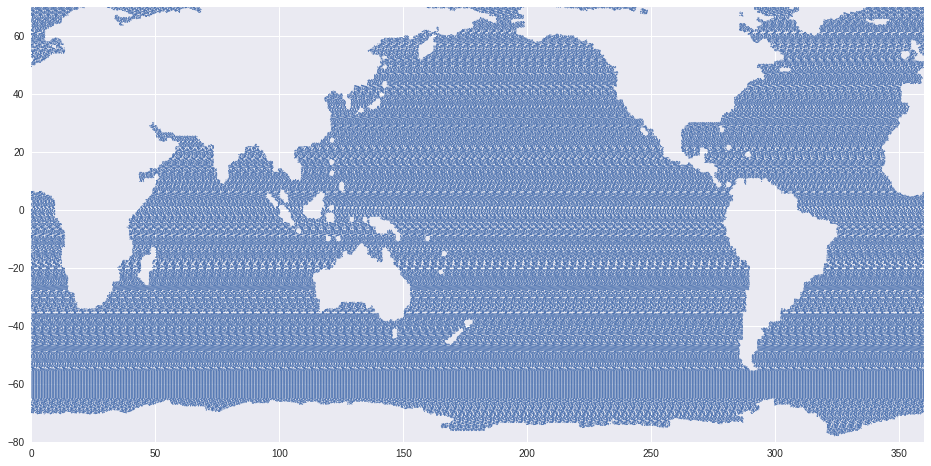

In [22]:
sns.set()
plt.rcParams['figure.figsize'] = (16, 8)
plt.scatter(x_rec[::100], y_rec[::100], edgecolor='none', s=1)
plt.xlim([0, 360])
plt.ylim([-80, 70])
plt.show()